In [34]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import  (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score
)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [35]:
df=pd.read_csv("sales_data_sample.csv",encoding='latin')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [37]:
num_feature = ['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP']

In [38]:
df = df[num_feature].dropna()

In [39]:
df

,QUANTITYORDERED,PRICEEACH,SALES,MSRP
0,30,95.70,2871.00,95
1,34,81.35,2765.90,95
2,41,94.74,3884.34,95
3,45,83.26,3746.70,95
4,49,100.00,5205.27,95
...,...,...,...,...
2818,20,100.00,2244.40,54
2819,29,100.00,3978.51,54
2820,43,100.00,5417.57,54
2821,34,62.24,2116.16,54


In [40]:
scaler = StandardScaler()
df_s = scaler.fit_transform(df)

In [41]:
df_s

array([[-0.52289086,  0.5969775 , -0.37082523, -0.14224584],
       [-0.11220131, -0.11445035, -0.42789707, -0.14224584],
       [ 0.60650538,  0.54938372,  0.17944282, -0.14224584],
       ...,
       [ 0.81185016,  0.81015797,  1.01202368, -1.16263387],
       [-0.11220131, -1.06186404, -0.78072155, -1.16263387],
       [ 1.2225397 , -0.89925195, -0.25763729, -1.16263387]],
      shape=(2823, 4))

In [42]:
inertia = []
for i in range(1, 20):
    model = KMeans(n_clusters=i, random_state=42)
    model.fit(df_s)
    inertia.append(model.inertia_)

In [43]:
inertia

[11292.0,
 6741.718661972149,
 4766.021664461497,
 4155.4049089433975,
 3760.5819744874107,
 3196.78140480782,
 2712.6949232901607,
 2358.8168313070237,
 2233.175911475808,
 2099.4282636557423,
 1935.127155660416,
 1800.077729151579,
 1708.1345439895938,
 1625.2207191270702,
 1533.1362350917161,
 1444.6553592780756,
 1380.5935269878744,
 1332.9627361836813,
 1283.6772097896007]

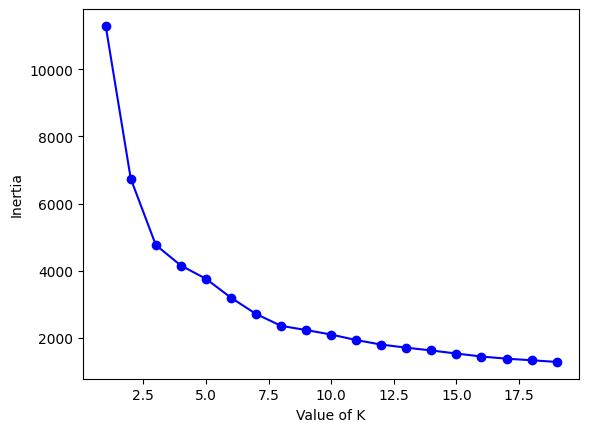

In [44]:
plt.plot(range(1, 20), inertia, 'bo-')
plt.xlabel("Value of K")
plt.ylabel("Inertia")
plt.show()

In [45]:
model = KMeans(n_clusters=4, random_state=42)
df["Cluster"] = model.fit_predict(df_s)

In [46]:
df

,QUANTITYORDERED,PRICEEACH,SALES,MSRP,Cluster
0,30,95.70,2871.00,95,1
1,34,81.35,2765.90,95,1
2,41,94.74,3884.34,95,2
3,45,83.26,3746.70,95,2
4,49,100.00,5205.27,95,2
...,...,...,...,...,...
2818,20,100.00,2244.40,54,1
2819,29,100.00,3978.51,54,1
2820,43,100.00,5417.57,54,2
2821,34,62.24,2116.16,54,3


In [47]:
model.inertia_

4155.4049089433975

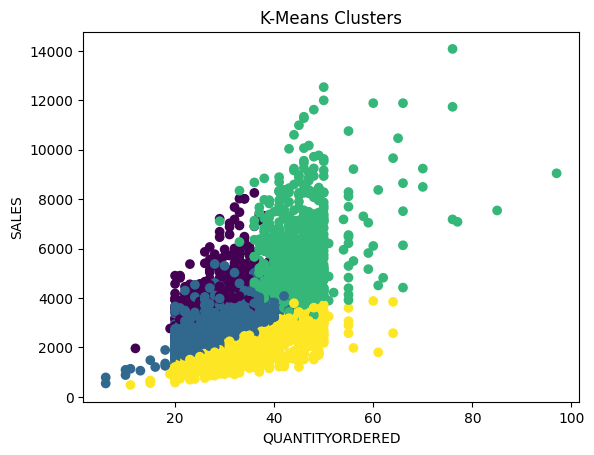

In [54]:
plt.scatter(df['QUANTITYORDERED'], df['SALES'], c=df['Cluster'])
plt.title('K-Means Clusters')
plt.xlabel('QUANTITYORDERED')
plt.ylabel('SALES')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add cluster labels to numeric data
df['Cluster'] = df['Cluster'].astype(str)  # for color mapping in seaborn

# Pairplot of all numeric features colored by cluster
sns.pairplot(df, hue='Cluster', diag_kind='kde', palette='viridis')
plt.suptitle('K-Means Clusters Visualization', y=1.02)
plt.show()